In [47]:
import pandas as pd
import numpy as np
import seaborn as sns
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler , LabelEncoder
from sklearn.cluster import KMeans
from sklearn.impute import SimpleImputer
import warnings
from sklearn.metrics import accuracy_score
warnings.filterwarnings('ignore')
df=pd.read_csv('C:\\Users\\manoj\\laptopprice\\csvfile\\Data_file - data_file.csv')
data=pd.DataFrame(df, columns=df)
print(df.shape)

(20640, 10)


In [10]:
print(df)
print(df.head())
print(df.describe())
print(df.notnull().sum())
print(df.isna().sum())

       longitude  latitude  housing_median_age  total_rooms  total_bedrooms  \
0        -122.23     37.88                  41          880           129.0   
1        -122.22     37.86                  21         7099          1106.0   
2        -122.24     37.85                  52         1467           190.0   
3        -122.25     37.85                  52         1274           235.0   
4        -122.25     37.85                  52         1627           280.0   
...          ...       ...                 ...          ...             ...   
20635    -121.09     39.48                  25         1665           374.0   
20636    -121.21     39.49                  18          697           150.0   
20637    -121.22     39.43                  17         2254           485.0   
20638    -121.32     39.43                  18         1860           409.0   
20639    -121.24     39.37                  16         2785           616.0   

       population  households  median_income  media

In [29]:
total_bedrooms = SimpleImputer(strategy='median')
df['total_bedrooms'] = total_bedrooms.fit_transform(df[['total_bedrooms']])
print(df.isna().sum().sum())


0


In [11]:
x=df[['longitude','latitude','total_rooms','median_income']]
y=df['median_house_value']
print(x,y)

       longitude  latitude  total_rooms  median_income
0        -122.23     37.88          880         8.3252
1        -122.22     37.86         7099         8.3014
2        -122.24     37.85         1467         7.2574
3        -122.25     37.85         1274         5.6431
4        -122.25     37.85         1627         3.8462
...          ...       ...          ...            ...
20635    -121.09     39.48         1665         1.5603
20636    -121.21     39.49          697         2.5568
20637    -121.22     39.43         2254         1.7000
20638    -121.32     39.43         1860         1.8672
20639    -121.24     39.37         2785         2.3886

[20640 rows x 4 columns] 0        452600
1        358500
2        352100
3        341300
4        342200
          ...  
20635     78100
20636     77100
20637     92300
20638     84700
20639     89400
Name: median_house_value, Length: 20640, dtype: int64


In [12]:
print(df.dtypes)

longitude             float64
latitude              float64
housing_median_age      int64
total_rooms             int64
total_bedrooms        float64
population              int64
households              int64
median_income         float64
median_house_value      int64
ocean_proximity        object
dtype: object


In [13]:
df.astype(str)
print(df.dtypes)

longitude             float64
latitude              float64
housing_median_age      int64
total_rooms             int64
total_bedrooms        float64
population              int64
households              int64
median_income         float64
median_house_value      int64
ocean_proximity        object
dtype: object


In [33]:
df = pd.DataFrame(df)


In [14]:
print(df)

       longitude  latitude  housing_median_age  total_rooms  total_bedrooms  \
0        -122.23     37.88                  41          880           129.0   
1        -122.22     37.86                  21         7099          1106.0   
2        -122.24     37.85                  52         1467           190.0   
3        -122.25     37.85                  52         1274           235.0   
4        -122.25     37.85                  52         1627           280.0   
...          ...       ...                 ...          ...             ...   
20635    -121.09     39.48                  25         1665           374.0   
20636    -121.21     39.49                  18          697           150.0   
20637    -121.22     39.43                  17         2254           485.0   
20638    -121.32     39.43                  18         1860           409.0   
20639    -121.24     39.37                  16         2785           616.0   

       population  households  median_income  media

In [35]:
df.shape

(20640, 10)

In [30]:
df.dropna()


,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41,880,129.0,322,126,8.3252,452600,NEAR BAY
1,-122.22,37.86,21,7099,1106.0,2401,1138,8.3014,358500,NEAR BAY
2,-122.24,37.85,52,1467,190.0,496,177,7.2574,352100,NEAR BAY
3,-122.25,37.85,52,1274,235.0,558,219,5.6431,341300,NEAR BAY
4,-122.25,37.85,52,1627,280.0,565,259,3.8462,342200,NEAR BAY
...,...,...,...,...,...,...,...,...,...,...
20635,-121.09,39.48,25,1665,374.0,845,330,1.5603,78100,INLAND
20636,-121.21,39.49,18,697,150.0,356,114,2.5568,77100,INLAND
20637,-121.22,39.43,17,2254,485.0,1007,433,1.7000,92300,INLAND
20638,-121.32,39.43,18,1860,409.0,741,349,1.8672,84700,INLAND


In [31]:
df.isnull().sum()

longitude             0
latitude              0
housing_median_age    0
total_rooms           0
total_bedrooms        0
population            0
households            0
median_income         0
median_house_value    0
ocean_proximity       0
dtype: int64

In [41]:
correlation= df[['longitude', 'latitude', 'housing_median_age', 'total_rooms', 
                       'total_bedrooms', 'population', 'households', 
                       'median_income', 'median_house_value']].corr()
print(correlation)

                    longitude  latitude  housing_median_age  total_rooms  \
longitude            1.000000 -0.924664           -0.108197     0.044568   
latitude            -0.924664  1.000000            0.011173    -0.036100   
housing_median_age  -0.108197  0.011173            1.000000    -0.361262   
total_rooms          0.044568 -0.036100           -0.361262     1.000000   
total_bedrooms       0.069120 -0.066484           -0.319026     0.927058   
population           0.099773 -0.108785           -0.296244     0.857126   
households           0.055310 -0.071035           -0.302916     0.918484   
median_income       -0.015176 -0.079809           -0.119034     0.198050   
median_house_value  -0.045967 -0.144160            0.105623     0.134153   

                    total_bedrooms  population  households  median_income  \
longitude                 0.069120    0.099773    0.055310      -0.015176   
latitude                 -0.066484   -0.108785   -0.071035      -0.079809   
housing_

<Axes: >

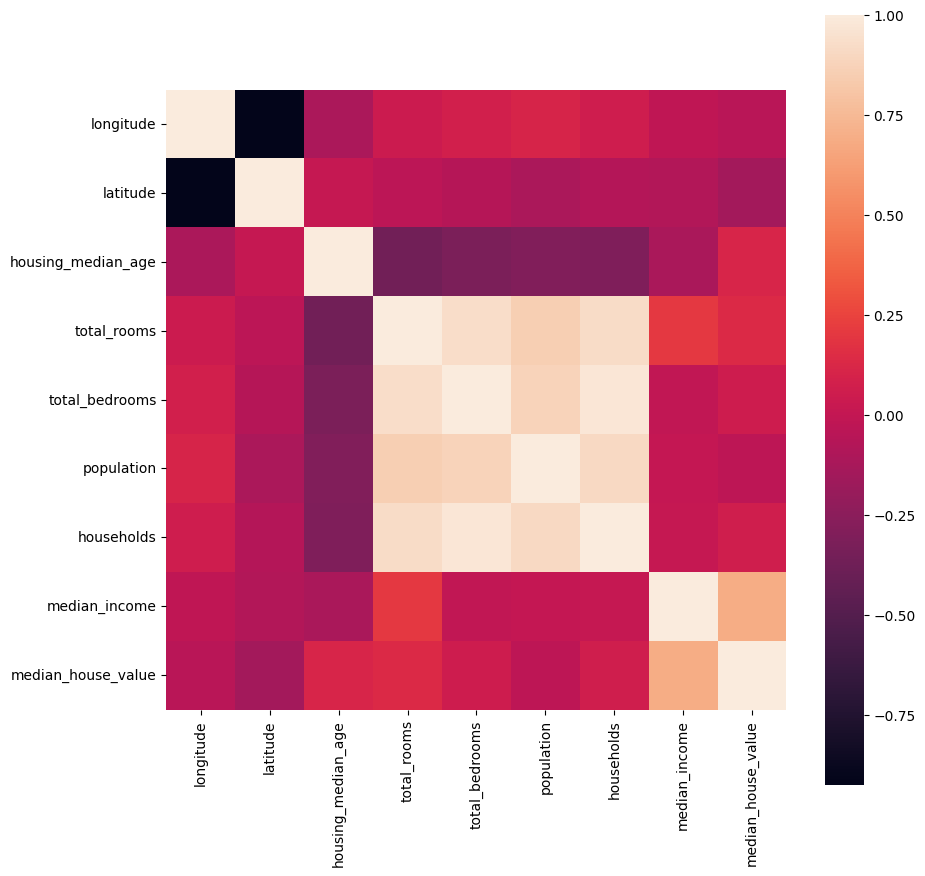

In [42]:

plt.figure(figsize=(10,10))
sns.heatmap(correlation, cbar=True ,square=True)

In [ ]:
print(data)

In [15]:
X_train, X_test, y_train, y_test = train_test_split( x ,y , test_size=0.3, random_state=42)
print("Train Set:", X_train,y_train)
print("Test Set:", X_test,y_test)

Train Set:        longitude  latitude  total_rooms  median_income
7061     -118.02     33.93         2400         4.1312
14689    -117.09     32.79         2183         2.8631
17323    -120.14     34.59         1601         4.2026
10056    -121.00     39.26          810         3.1094
15750    -122.45     37.77         3188         3.3068
...          ...       ...          ...            ...
11284    -117.96     33.78         1330         6.3700
11964    -117.43     34.02         3084         3.0500
5390     -118.38     34.03         2101         2.9344
860      -121.96     37.58         3575         5.7192
15795    -122.42     37.77         4226         2.5755

[14448 rows x 4 columns] 7061     193800
14689    169700
17323    259800
10056    136100
15750    500001
          ...  
11284    229200
11964     97800
5390     222100
860      283500
15795    325000
Name: median_house_value, Length: 14448, dtype: int64
Test Set:        longitude  latitude  total_rooms  median_income
20046   

In [65]:
model=LinearRegression()
model.fit(X_train,y_train)

LinearRegression()

In [67]:
y_pred=model.predict(X_test)


In [50]:
#print(accuracy_score(y_pred,y_test))
#print(accuracy_score(X_train,y_train))

In [68]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

In [69]:
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
print(f'MAE: {mae}, MSE: {mse}, R²: {r2}')

MAE: 54379.22504084098, MSE: 5441857031.874843, R²: 0.5853949910194611


In [56]:
r2 = r2_score(y_test, y_pred)
print(f'R2:{r2}')

R2:0.5853949910194611
